In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten, GlobalMaxPool1D, LSTM,GRU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Building The Dataset
T = 10
D = 1
X = []
Y = []

def get_label (x, i1, i2, i3):

  if x [i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x [i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x [i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x [i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0


for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # here the pattern for the series is at the end and not at the beginning, thus remembereing the pattern is not an issue.
  #y = get_label(x, 0, 1, 2)
  Y.append(y)

X = np.array(X) # making the data a N x T x D array
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (5000, 10) Y.shape (5000,)


In [5]:
print (X.shape)
inputs = np.expand_dims(X, -1)
print (inputs.shape)
i = Input(shape = (T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = 'sigmoid') (x)
model = Model(i,x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['accuracy'])

(5000, 10)
(5000, 10, 1)


In [6]:
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 2s 12ms/step - loss: 0.6823 - accuracy: 0.5736 - val_loss: 0.6620 - val_accuracy: 0.6388
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6396 - accuracy: 0.6916 - val_loss: 0.6090 - val_accuracy: 0.7360
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.5714 - accuracy: 0.7784 - val_loss: 0.5251 - val_accuracy: 0.8040
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4717 - accuracy: 0.8468 - val_loss: 0.4103 - val_accuracy: 0.8720
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3716 - accuracy: 0.8860 - val_loss: 0.3225 - val_accuracy: 0.9032
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3034 - accuracy: 0.9028 - val_loss: 0.2691 - val_accuracy: 0.9144
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2582 - accuracy: 0.9260 - val_loss: 0.2292 - val_accuracy: 0.9336
Epoch 8/200


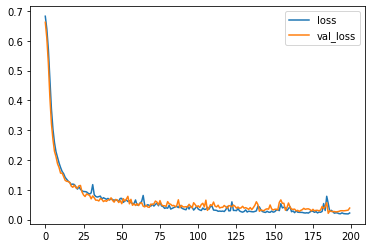

In [7]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

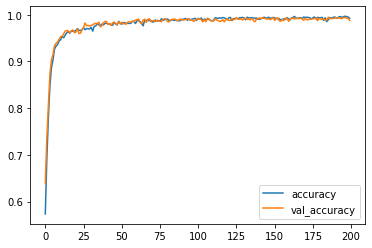

In [8]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [9]:
# Building The Dataset ---- SimpleRNN
T = 10
D = 1
X = []
Y = []

def get_label (x, i1, i2, i3):

  if x [i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x [i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x [i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x [i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0


for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # here the pattern for the series is at the beginning no longer at the end, thus remembering the pattern will be  an issue.
  
  Y.append(y)

X = np.array(X) # making the data a N x T x D array
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (5000, 10) Y.shape (5000,)


In [15]:
inputs = np.expand_dims(X, -1)
i = Input(shape = (T, D))
x = SimpleRNN(5)(i)
x = Dense (1, activation = 'sigmoid') (x)
model = Model(i, x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['accuracy'])

In [16]:
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5) #this shows that SimpleRNN struggles as the loss and accuracy are low.

Epoch 1/200
79/79 [==============================] - 1s 8ms/step - loss: 0.7022 - accuracy: 0.4956 - val_loss: 0.6956 - val_accuracy: 0.5004
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.5036 - val_loss: 0.6961 - val_accuracy: 0.4952
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.5068 - val_loss: 0.6949 - val_accuracy: 0.4988
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6927 - accuracy: 0.5104 - val_loss: 0.6956 - val_accuracy: 0.4972
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.5204 - val_loss: 0.6953 - val_accuracy: 0.4960
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6905 - accuracy: 0.5312 - val_loss: 0.6841 - val_accuracy: 0.5556
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6738 - accuracy: 0.5744 - val_loss: 0.6852 - val_accuracy: 0.5780
Epoch 8/200
7

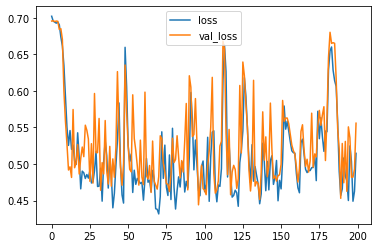

In [17]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

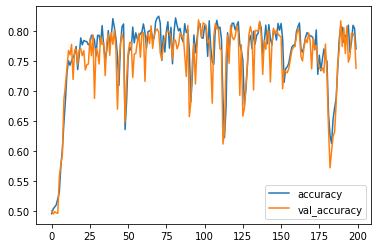

In [18]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [19]:
#Using LSTM instaed of SimpleRNN
inputs = np.expand_dims(X, -1)
i = Input(shape = (T, D))
x = LSTM(5)(i)
x = Dense (1, activation = 'sigmoid') (x)
model = Model(i, x)
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['accuracy'])

In [20]:
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 3s 13ms/step - loss: 0.6942 - accuracy: 0.5144 - val_loss: 0.6954 - val_accuracy: 0.4892
Epoch 2/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6936 - accuracy: 0.5072 - val_loss: 0.6943 - val_accuracy: 0.5004
Epoch 3/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6925 - accuracy: 0.5092 - val_loss: 0.6945 - val_accuracy: 0.4824
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6925 - accuracy: 0.5240 - val_loss: 0.6949 - val_accuracy: 0.4968
Epoch 5/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6924 - accuracy: 0.5184 - val_loss: 0.6952 - val_accuracy: 0.4988
Epoch 6/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6926 - accuracy: 0.5108 - val_loss: 0.6954 - val_accuracy: 0.4864
Epoch 7/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6923 - accuracy: 0.5124 - val_loss: 0.6946 - val_accuracy: 0.4992
Epoch 8/200

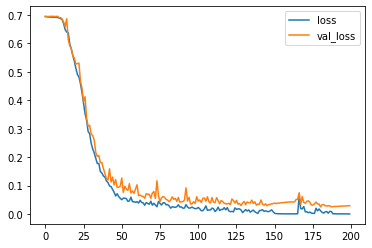

In [21]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

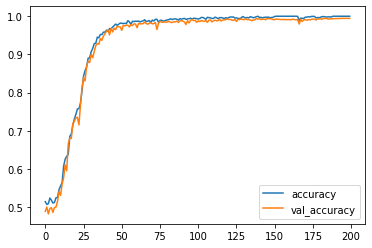

In [22]:

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [23]:
# Building The Dataset for LSTM
T = 20
D = 1
X = []
Y = []

def get_label (x, i1, i2, i3):

  if x [i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x [i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x [i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x [i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0


for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # here the pattern for the series is at the beginning no longer at the end, thus remembering the pattern will be  an issue.
  
  Y.append(y)

X = np.array(X) # making the data a N x T x D array
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (5000, 20) Y.shape (5000,)


In [24]:
inputs = np.expand_dims(X, -1)
i = Input(shape = (T, D)) # 2 dimension input shape
x = LSTM(5)(i)# using LSTM with 5 hidden layers
x = Dense (1, activation = 'sigmoid') (x) # 1 Dense Layer and using simoid activation because of the type of output
model = Model(i, x) 
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['accuracy']) # 

In [25]:
r = model.fit(inputs, Y, epochs = 200, validation_split = 0.5) #LSTM struggled to find with the increase of the time series

Epoch 1/200
79/79 [==============================] - 3s 16ms/step - loss: 0.6955 - accuracy: 0.4948 - val_loss: 0.6929 - val_accuracy: 0.5028
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6934 - accuracy: 0.5116 - val_loss: 0.6929 - val_accuracy: 0.5092
Epoch 3/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6933 - accuracy: 0.5068 - val_loss: 0.6932 - val_accuracy: 0.5092
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6930 - accuracy: 0.5172 - val_loss: 0.6932 - val_accuracy: 0.5100
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6934 - accuracy: 0.5152 - val_loss: 0.6930 - val_accuracy: 0.5084
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6926 - accuracy: 0.5128 - val_loss: 0.6932 - val_accuracy: 0.5128
Epoch 7/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6927 - accuracy: 0.5228 - val_loss: 0.6932 - val_accuracy: 0.5056
Epoch 

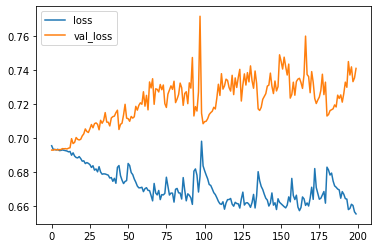

In [26]:
#The plot shows that LSTM struggled to remember the pattern because it was too long for it.
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

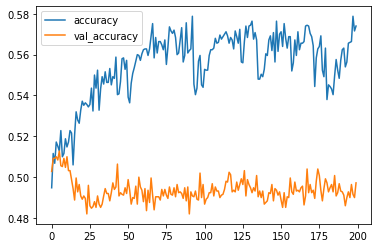

In [27]:

plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [29]:
#adoption of LSTM with GlobalMaxPool1D in order to improve the ability of the algorith to remember the results from all the ht (ht(1) to ht(t))
inputs = np.expand_dims(X, -1)
i = Input(shape = (T, D)) # 2 dimension input shape
x = LSTM(5, return_sequences = True)(i)# using LSTM with 5 hidden layers
x = GlobalMaxPool1D()(x)
x = Dense (1, activation = 'sigmoid') (x) # 1 Dense Layer and using simoid activation because of the type of output
model = Model(i, x) 
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['accuracy']) # 

In [30]:
r = model.fit (inputs, Y, epochs = 100, validation_split = 0.5)

Epoch 1/100
79/79 [==============================] - 3s 17ms/step - loss: 0.6929 - accuracy: 0.5100 - val_loss: 0.6962 - val_accuracy: 0.5084
Epoch 2/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.5048 - val_loss: 0.6939 - val_accuracy: 0.5012
Epoch 3/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6933 - accuracy: 0.5060 - val_loss: 0.6942 - val_accuracy: 0.4908
Epoch 4/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6931 - accuracy: 0.5028 - val_loss: 0.6949 - val_accuracy: 0.4920
Epoch 5/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6924 - accuracy: 0.5132 - val_loss: 0.6943 - val_accuracy: 0.5024
Epoch 6/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6899 - accuracy: 0.5368 - val_loss: 0.6952 - val_accuracy: 0.5080
Epoch 7/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6895 - accuracy: 0.5200 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 

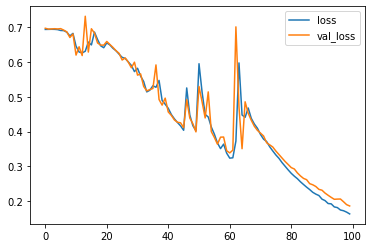

In [34]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

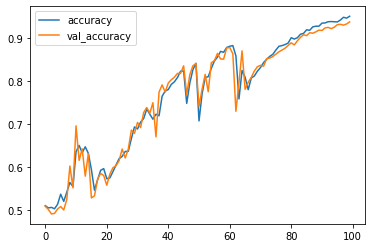

In [36]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [37]:
# Building The Dataset for LSTM - here we made the pattern to change
T = 20
D = 1
X = []
Y = []

def get_label (x, i1, i2, i3):

  if x [i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x [i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x [i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x [i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0


for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 10, -1) # here the pattern for the series is at the beginning, middle and the end.
  
  Y.append(y)

X = np.array(X) # making the data a N x T x D array
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (5000, 20) Y.shape (5000,)


In [38]:
nputs = np.expand_dims(X, -1)
i = Input(shape = (T, D)) # 2 dimension input shape
x = LSTM(5, return_sequences = True)(i)# using LSTM with 5 hidden layers
x = GlobalMaxPool1D()(x)
x = Dense (1, activation = 'sigmoid') (x) # 1 Dense Layer and using simoid activation because of the type of output
model = Model(i, x) 
model.compile(loss = 'binary_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['accuracy']) # 

In [39]:
r = model.fit (inputs, Y, epochs = 100, validation_split = 0.5)

Epoch 1/100
79/79 [==============================] - 3s 16ms/step - loss: 0.6941 - accuracy: 0.5120 - val_loss: 0.6944 - val_accuracy: 0.4972
Epoch 2/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6940 - accuracy: 0.5032 - val_loss: 0.6957 - val_accuracy: 0.4960
Epoch 3/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6942 - accuracy: 0.5056 - val_loss: 0.6948 - val_accuracy: 0.4960
Epoch 4/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6934 - accuracy: 0.5188 - val_loss: 0.6944 - val_accuracy: 0.4968
Epoch 5/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6929 - accuracy: 0.5136 - val_loss: 0.6942 - val_accuracy: 0.4968
Epoch 6/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6928 - accuracy: 0.5160 - val_loss: 0.6939 - val_accuracy: 0.5012
Epoch 7/100
79/79 [==============================] - 1s 11ms/step - loss: 0.6929 - accuracy: 0.5080 - val_loss: 0.6942 - val_accuracy: 0.4996
Epoch 

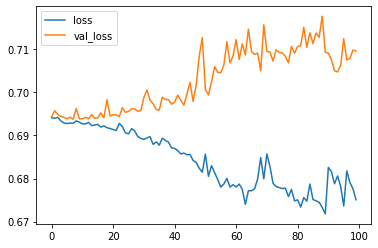

In [40]:
#The plot shows that the LSTM and GlobalMaxPool didnt do well this time.
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [41]:
#Let's change the epochs this time and increase it to see if it will do better.
r = model.fit (inputs, Y, epochs = 250, validation_split = 0.5)

Epoch 1/250
79/79 [==============================] - 2s 20ms/step - loss: 0.6751 - accuracy: 0.5672 - val_loss: 0.7091 - val_accuracy: 0.4996
Epoch 2/250
79/79 [==============================] - 1s 15ms/step - loss: 0.6740 - accuracy: 0.5644 - val_loss: 0.7093 - val_accuracy: 0.5048
Epoch 3/250
79/79 [==============================] - 1s 11ms/step - loss: 0.6708 - accuracy: 0.5840 - val_loss: 0.7105 - val_accuracy: 0.4844
Epoch 4/250
79/79 [==============================] - 1s 11ms/step - loss: 0.6742 - accuracy: 0.5724 - val_loss: 0.7114 - val_accuracy: 0.4872
Epoch 5/250
79/79 [==============================] - 1s 10ms/step - loss: 0.6708 - accuracy: 0.5832 - val_loss: 0.7107 - val_accuracy: 0.4948
Epoch 6/250
79/79 [==============================] - 1s 11ms/step - loss: 0.6716 - accuracy: 0.5828 - val_loss: 0.7121 - val_accuracy: 0.4836
Epoch 7/250
79/79 [==============================] - 1s 11ms/step - loss: 0.6705 - accuracy: 0.5636 - val_loss: 0.7139 - val_accuracy: 0.4924
Epoch 

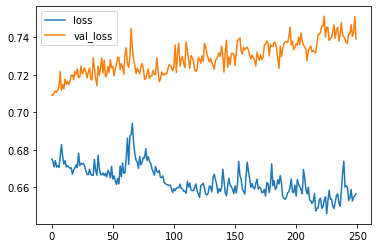

In [43]:
#The plot shows that the LSTM and GlobalMaxPool did not do better even with the increase in epochs.
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

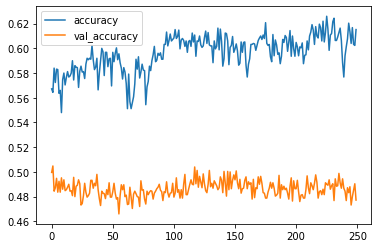

In [44]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()